In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
plt.style.use("Solarize_Light2")
%matplotlib inline

In [3]:
df= pd.read_csv("Real estate.csv",encoding = "ISO-8859-1")

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.shape

(414, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


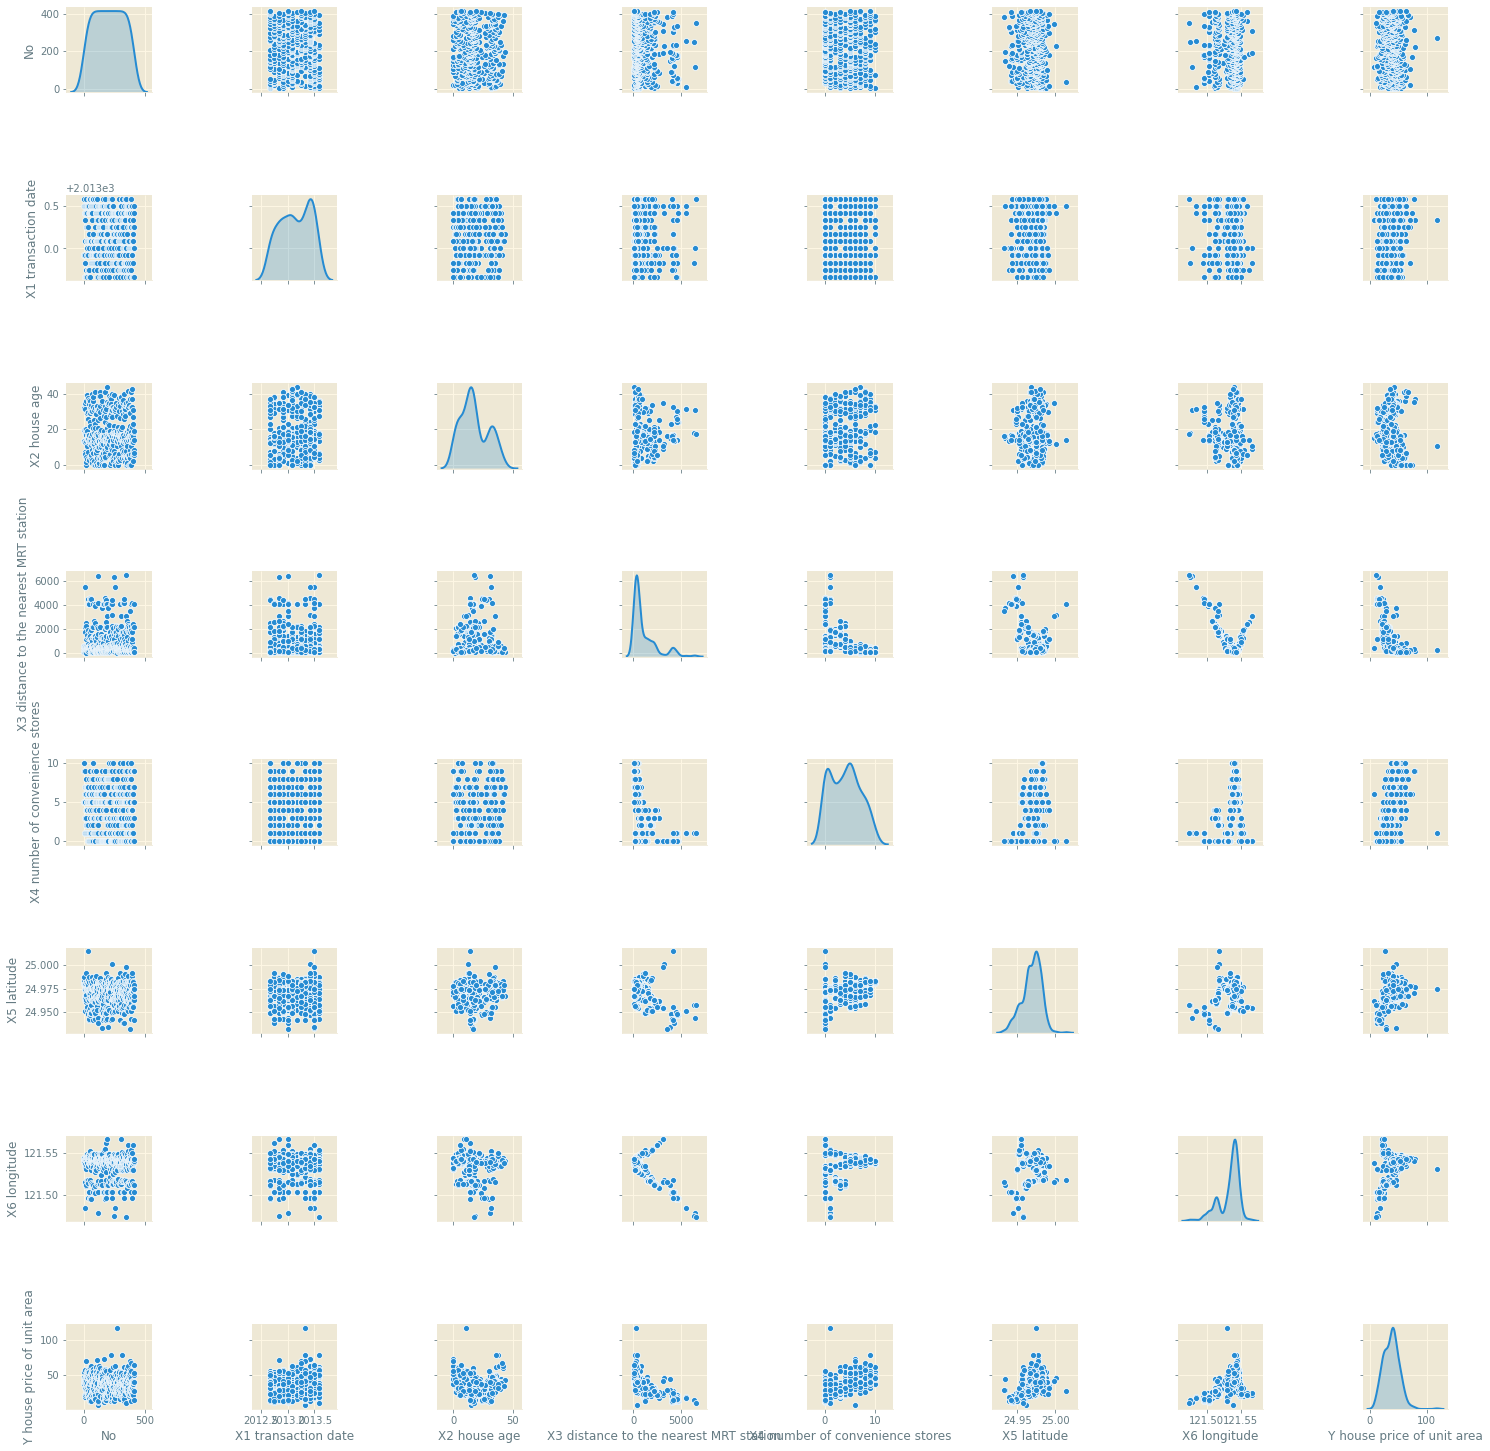

In [7]:
sns.pairplot(df,diag_kind='kde')

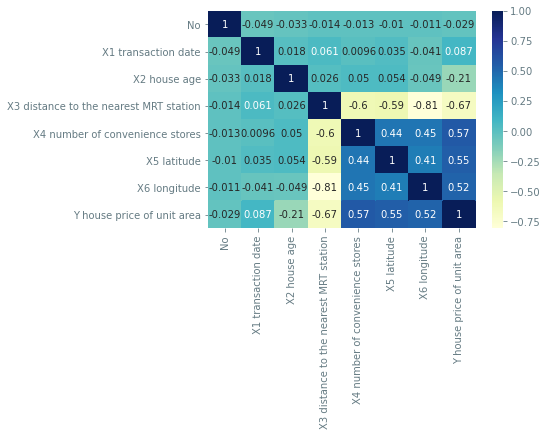

In [8]:
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')

In [10]:
X=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
model= LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])

,Coeficient
No,-0.002924
X1 transaction date,4.686684
X2 house age,-0.275675
X3 distance to the nearest MRT station,-0.004249
X4 number of convenience stores,1.178325
X5 latitude,240.947692
X6 longitude,18.669459


In [17]:
y_pred=model.predict(X_test)

In [18]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred }).head(5)

,Y_Test,Y_Pred
176,19.2,12.802665
347,11.2,9.549151
307,24.7,22.516894
299,46.1,48.213227
391,31.3,31.972364


In [19]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.373025
MSE,45.880307
RMSE,6.773500


In [20]:
df['Y house price of unit area'].mean()

37.98019323671498

In [21]:
test_residuals=y_test-y_pred
pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'test_residuals':y_test-y_pred})

,y_test,y_pred,test_residuals
176,19.2,12.802665,6.397335
347,11.2,9.549151,1.650849
307,24.7,22.516894,2.183106
299,46.1,48.213227,-2.113227
391,31.3,31.972364,-0.672364
...,...,...,...
16,70.1,52.170050,17.929950
31,25.0,41.875025,-16.875025
36,22.9,30.976923,-8.076923
41,18.2,16.461301,1.738699


Text(0, 0.5, 'Y-Pred')

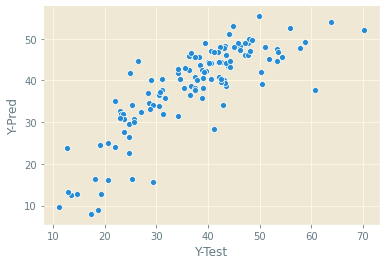

In [22]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

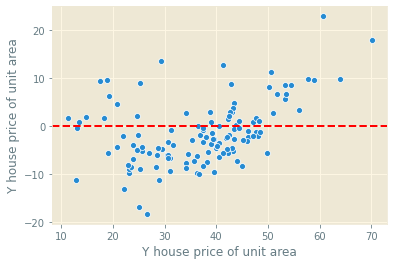

In [23]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

In [25]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)
poly_features=polynomial_converter.fit_transform(X)
poly_features.shape

(414, 35)

In [26]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit_transform(X)
    
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
      #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
     #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [27]:
pd.DataFrame({'Train RMSE List':train_RMSE_list})

,Train RMSE List
0,9.537107
1,8.037433
2,7.100071
3,7.481872
4,1.805515
5,0.514558
6,0.725884
7,0.378083
8,0.435368


In [28]:
pd.DataFrame({'Ttest RMSE List':test_RMSE_list})

,Ttest RMSE List
0,6.773500e+00
1,5.692352e+00
2,2.378835e+01
3,2.889713e+02
4,6.279818e+03
5,3.639787e+04
6,2.014367e+05
7,1.588546e+06
8,1.501148e+07


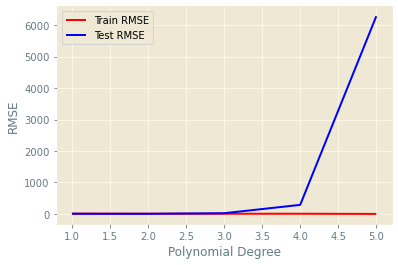

In [29]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE',color='r')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE',color='b')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [32]:
#Train the Model
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [33]:
#predict Test Data
y_pred= ridge_model.predict(X_test)

In [34]:
#Evaluating the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE= mean_absolute_error(y_test, y_pred)
MSE= mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [35]:
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,7.372539
MSE,176.119344
RMSE,13.270996


In [36]:
#Train the Model
from sklearn.linear_model import RidgeCV
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0,100), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   1. ,  10. , 100. ]),
        scoring='neg_mean_absolute_error')

In [37]:
ridge_cv_model.alpha_

100.0

In [38]:
#Predicting Test Data
y_pred_ridge= ridge_cv_model.predict(X_test)

In [39]:
MAE_ridge= mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge= mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge= np.sqrt(MSE_ridge)

In [40]:
pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge], index=['MAE', 'MSE', 'RMSE'], columns=['Ridge Metrics'])

,Ridge Metrics
MAE,5.429147
MSE,67.292610
RMSE,8.203207


In [41]:
ridge_cv_model.coef_

array([ 0.00421648,  0.02060867, -0.05125667, ...,  0.01058127,
       -0.00314608, -0.02248971])

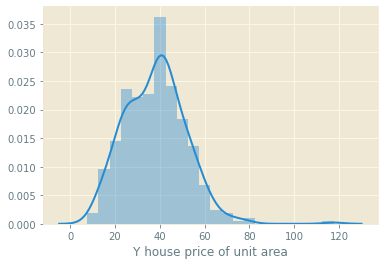

In [46]:
#Exploring the PDF and dealing with outliers
sns.distplot(df['Y house price of unit area'])

In [50]:

q = df["Y house price of unit area"].quantile(0.99)
df_1 = df[df['Y house price of unit area']<q]
df_1.describe(include='all')

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,207.400978,2013.147127,17.725183,1093.850998,4.068460,24.968952,121.533273,37.421516
std,120.108573,0.281830,11.314879,1266.559410,2.936452,0.012462,0.015409,12.565902
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,103.000000,2012.917000,9.100000,289.324800,1.000000,24.962990,121.527600,27.300000
50%,207.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.300000
75%,311.000000,2013.417000,28.000000,1455.798000,6.000000,24.977950,121.543290,46.100000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,70.100000


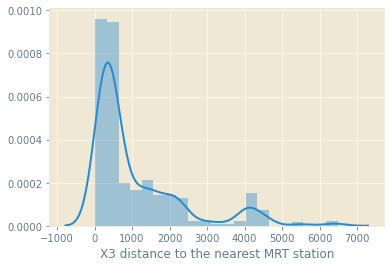

In [51]:
sns.distplot(df_1['X3 distance to the nearest MRT station'])

In [54]:
#data cleaning
df_cleaned = df.reset_index(drop=True)

In [56]:
df_cleaned.describe(include='all')

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


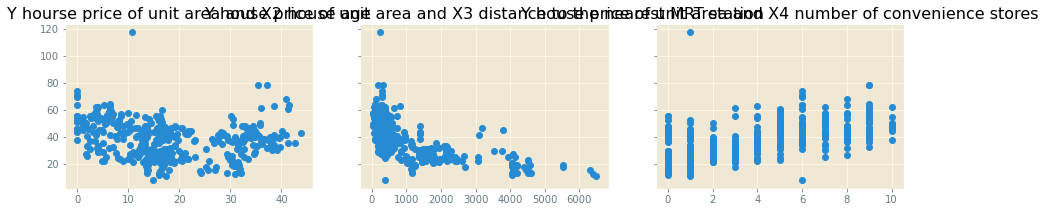

In [63]:
#Checking the OLS assumptions
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(df_cleaned['X2 house age'],df_cleaned['Y house price of unit area'])
ax1.set_title('Y hourse price of unit area and X2 house age')
ax2.scatter(df_cleaned['X3 distance to the nearest MRT station'],df_cleaned['Y house price of unit area'])
ax2.set_title('Y house price of unit area and X3 distance to the nearest MRT station')
ax3.scatter(df_cleaned['X4 number of convenience stores'],df_cleaned['Y house price of unit area'])
ax3.set_title('Y house price of unit area and X4 number of convenience stores')


plt.show()

In [65]:
#Relaxing the assumptions
log_price = np.log(df_cleaned['Y house price of unit area'])

df_cleaned["log_price"] = log_price

df_cleaned

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3.634951
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3.742420
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,3.856510
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,4.003690
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3.763523
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,2.734368
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,3.912023
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,3.703768
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,3.960813


In [66]:
#Linear regression model
targets = df_cleaned['log_price']
inputs = df_cleaned.drop(['log_price'],axis=1)

In [67]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

In [68]:
#create the regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [69]:
y_hat = reg.predict(x_train)

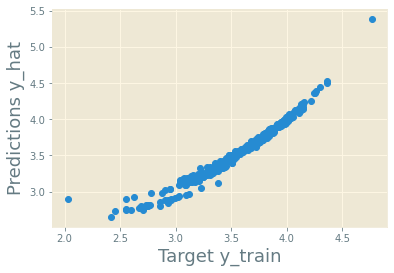

In [70]:
plt.scatter(y_train,y_hat)

plt.xlabel('Target y_train', size=18)
plt.ylabel('Predictions y_hat', size=18)

plt.show()

In [71]:
reg.score(x_train,y_train)

0.9517399879106581

In [72]:
#Finding weight and biases
reg.intercept_

-184.1557608273512

In [73]:
reg.coef_

array([ 6.50199814e-07,  5.14145925e-03, -8.33823079e-04, -4.00611242e-05,
        3.06992217e-03,  3.41435496e+00,  7.51320871e-01,  2.23571024e-02])